In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/data.csv')

df.head(3)

,commute_before,commute_after
0,40.483571,30.991467
1,37.308678,43.261391
2,41.238443,33.932514


In [3]:
#commute_time열만 추출해서 시리즈로 만듬
commute_before = df['commute_before']
commute_after = df['commute_after']

print(f'도입 전 평균 통근 시간: {np.mean(commute_before):.2f}분')
print(f'도입 후 평균 통근 시간: {np.mean(commute_after):.2f}분')

도입 전 평균 통근 시간: 37.06분
도입 후 평균 통근 시간: 33.39분


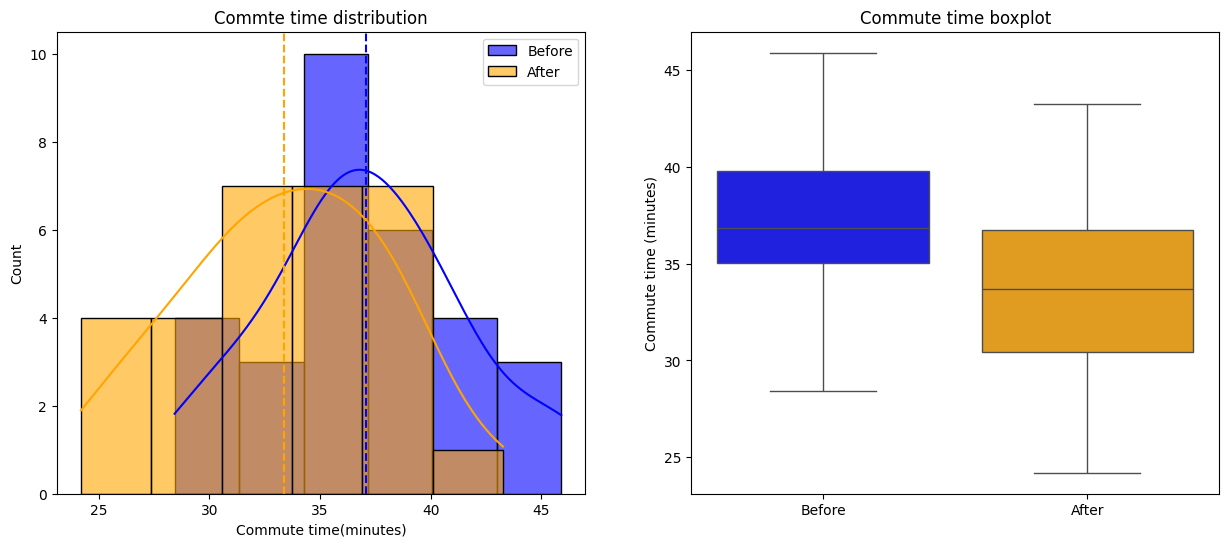

In [18]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)

sns.histplot(commute_before, kde = True, color='blue', label='Before', alpha =0.6)

sns.histplot(commute_after, kde=True, color='orange', label='After', alpha=0.6)

plt.axvline(np.mean(commute_before), color='blue', linestyle='dashed')

plt.axvline(np.mean(commute_after), color='orange', linestyle='dashed')

plt.title('Commte time distribution')
plt.xlabel('Commute time(minutes)')
plt.legend()

plt.subplot(1,2,2)

sns.boxplot(data=[commute_before, commute_after], palette=['blue', 'orange'])

plt.xticks( [0,1], ['Before', 'After'])
plt.title('Commute time boxplot')
plt.ylabel('Commute time (minutes)')

plt.show()

In [19]:
shapiro_before = stats.shapiro(commute_before)

shapiro_after = stats.shapiro(commute_after)

print(f"Shapiro-Wilk 검정 (도입 전) p-value: {shapiro_before.pvalue:.4f}")  
print(f"Shapiro-Wilk 검정 (도입 후) p-value: {shapiro_after.pvalue:.4f}")  

Shapiro-Wilk 검정 (도입 전) p-value: 0.6868
Shapiro-Wilk 검정 (도입 후) p-value: 0.9130


두 p-value 다 0.5보다 크다 -> 정규성을 만족한다 

In [25]:
t_stat, p_value = stats.ttest_ind(commute_before, commute_after, equal_var=False)  
# 독립 표본 t-검정 수행, equal_var 여부 입력

print(f"t-통계량: {t_stat:.4f}")  
print(f"p-value: {p_value:.4f}")  

t-통계량: 3.1004
p-value: 0.0030


In [26]:
t_stat, p_value = stats.ttest_ind(commute_before, commute_after, equal_var=True)  
# 독립 표본 t-검정 수행, equal_var 여부 입력

print(f"t-통계량: {t_stat:.4f}")  
print(f"p-value: {p_value:.4f}")  

t-통계량: 3.1004
p-value: 0.0030


p-value가 0.05보다 작으므로 통계적으로 유의미한 차이가 읍다.